In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *

LetsPlot.setup_html(no_js=True)

### You don't need to use these settings yourself,
### they are just here to make the charts look nicer!
# Set the plot style for prettier charts:
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [3]:
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [5]:
df = df.set_index("Year")
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-0.39,-0.53,-0.23,-0.30,-0.05,-0.18,-0.22,-0.25,-0.24,-0.30,-0.43,-0.42,-0.30,NaN,NaN,-0.20,-0.22,-0.32
1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.28,-0.44,-0.37,-0.24,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
1882,0.25,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.33,-0.68,-0.21,-0.17,0.08,-0.17,-0.24,-0.37
1883,-0.57,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.44,-0.15,-0.29,-0.33,-0.64,-0.23,-0.14,-0.32
1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.41,-0.41,-0.52,-0.45,-0.44,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.49


In [7]:
df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
2020,1.59,1.69,1.66,1.39,1.27,1.14,1.10,1.12,1.19,1.21,1.58,1.18,1.34,1.36,1.56,1.44,1.12,1.33
2021,1.25,0.96,1.20,1.13,1.05,1.21,1.07,1.02,1.05,1.29,1.29,1.17,1.14,1.14,1.13,1.13,1.10,1.21
2022,1.24,1.16,1.41,1.09,1.02,1.13,1.06,1.17,1.15,1.31,1.09,1.06,1.16,1.17,1.19,1.17,1.12,1.19
2023,1.29,1.29,1.64,1.01,1.13,1.19,1.44,1.57,1.67,1.88,1.97,1.85,1.50,1.43,1.22,1.26,1.40,1.84
2024,1.67,1.93,1.77,1.79,1.44,1.54,1.42,1.42,1.58,1.72,1.90,NaN,NaN,1.67,1.82,1.67,1.46,1.73


KeyError: 'column_name'

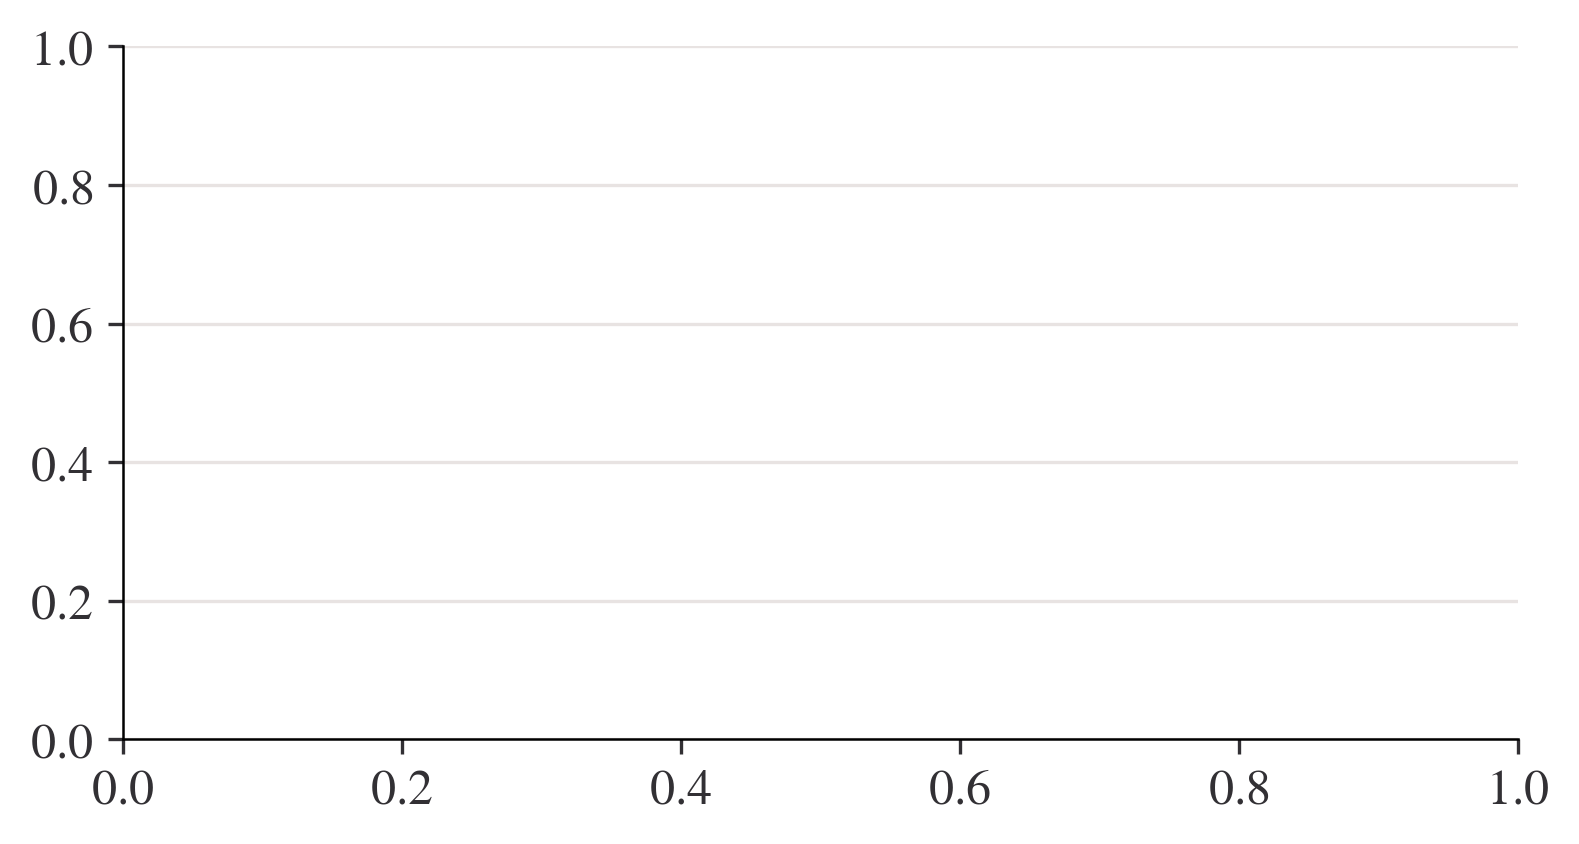

In [9]:
# create a figure (a bit like a canvas) and an axis (ax)
# onto which to put chart elements
fig, ax = plt.subplots()
# select the column to use 'plot' on, and pass the 'ax' object
# note that the horizontal axis is given by the index of the dataframe
df["column_name"].plot(ax=ax)
# set the labels and title
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
# show the plot
plt.show()

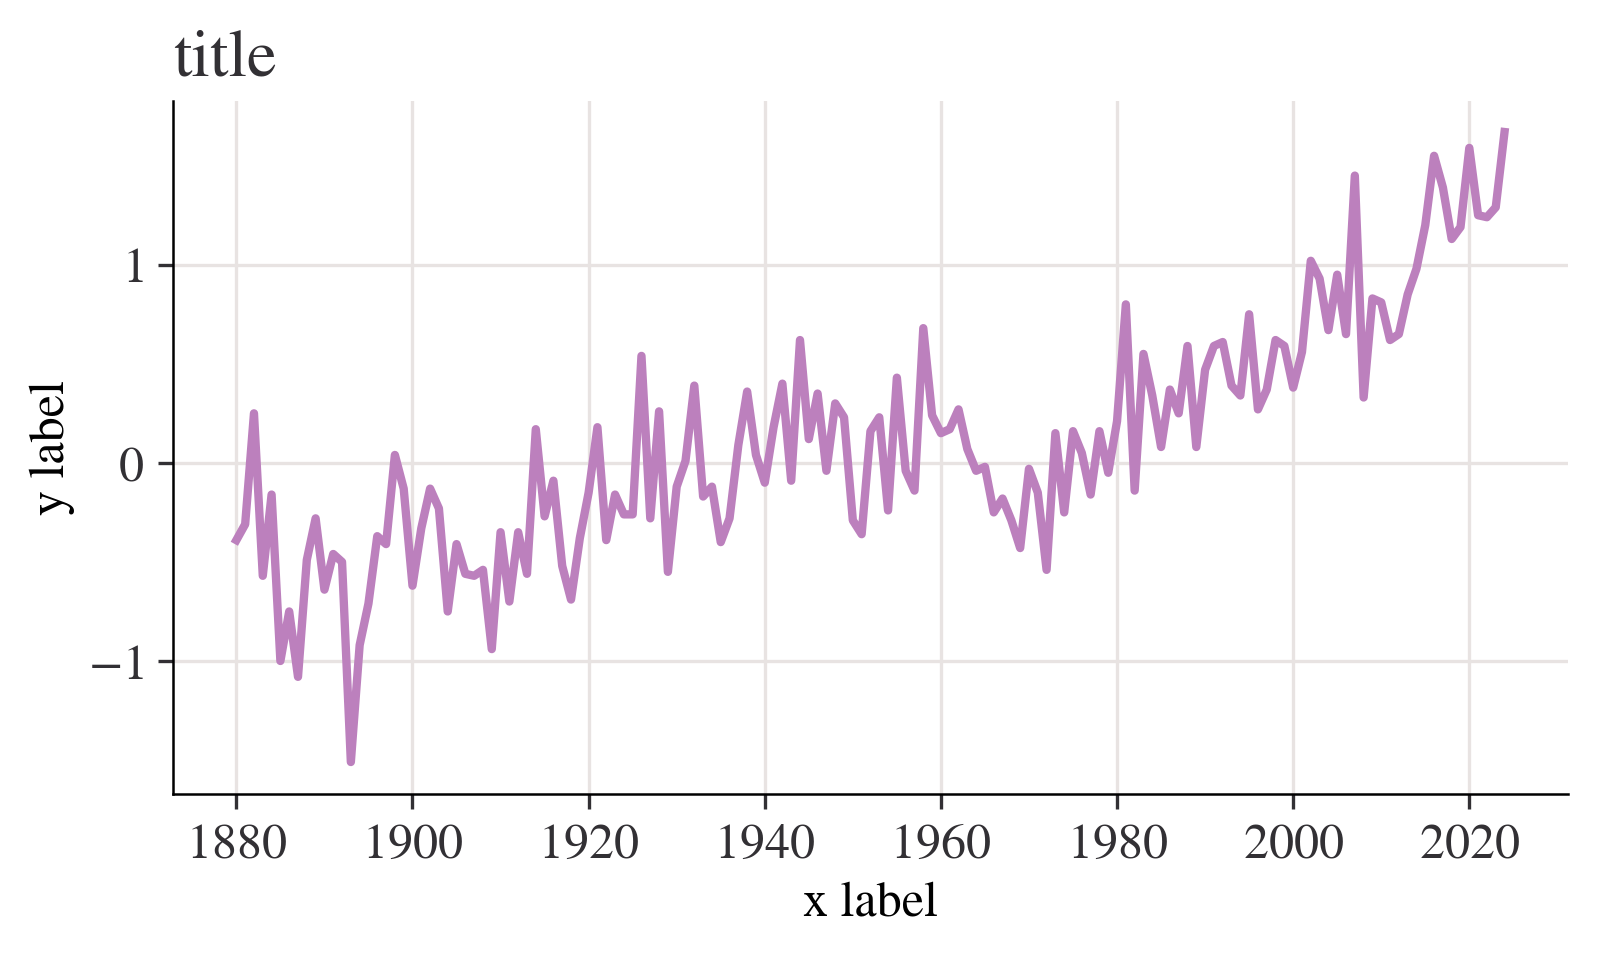

In [11]:
fig, ax = plt.subplots()
df["Jan"].plot(ax=ax)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

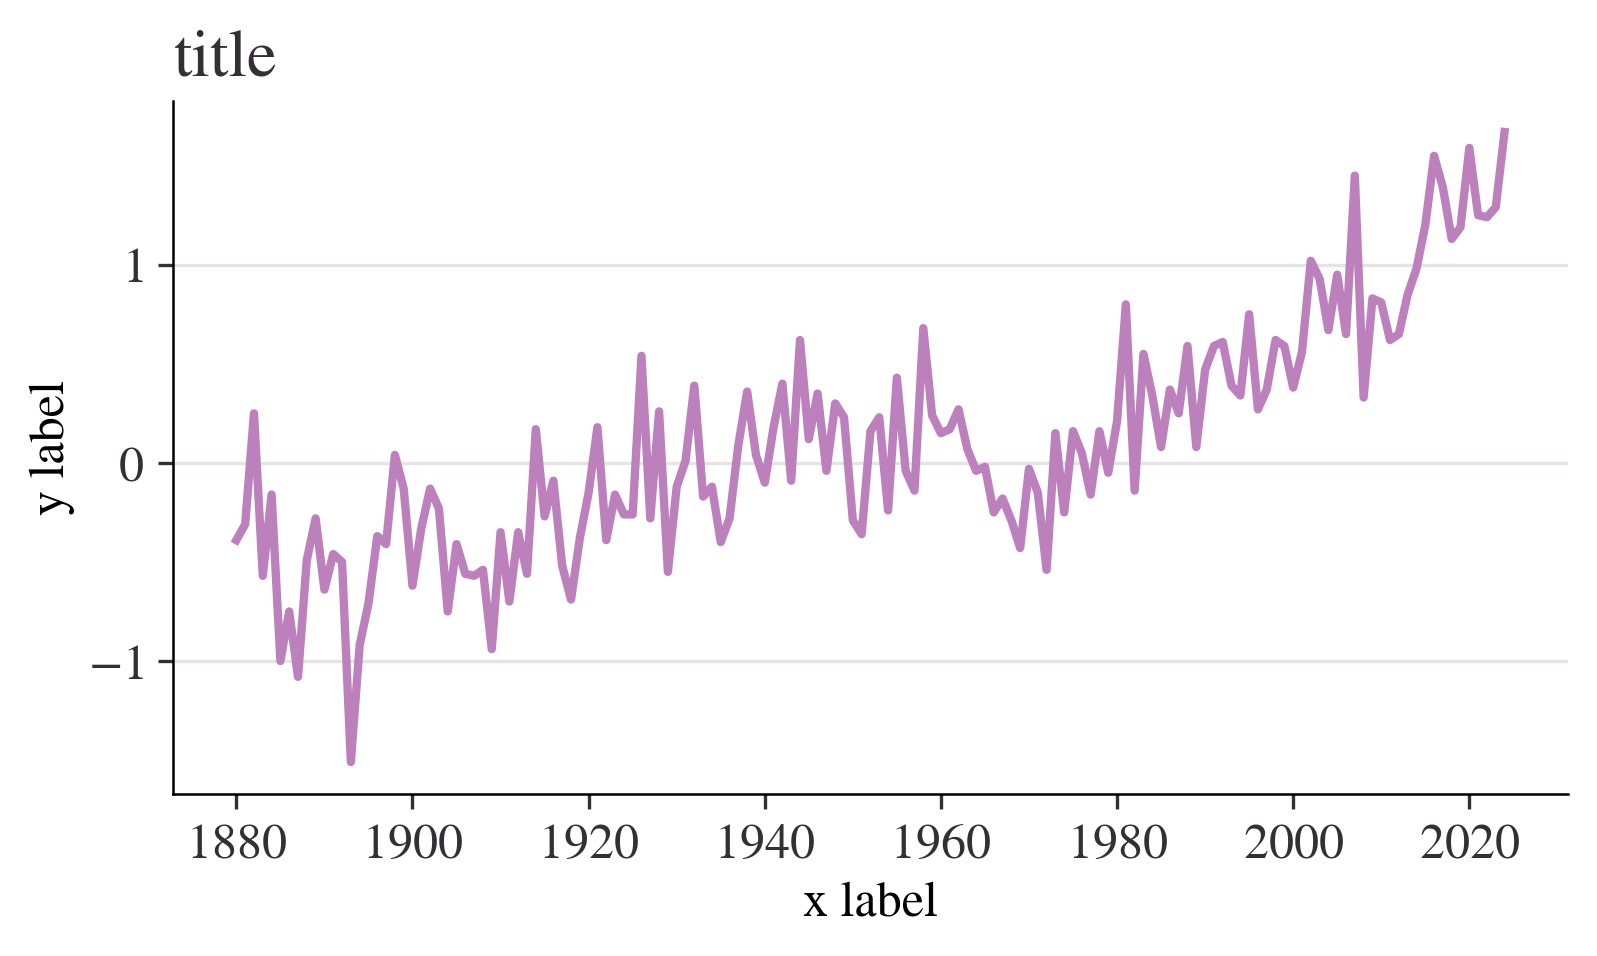

In [13]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

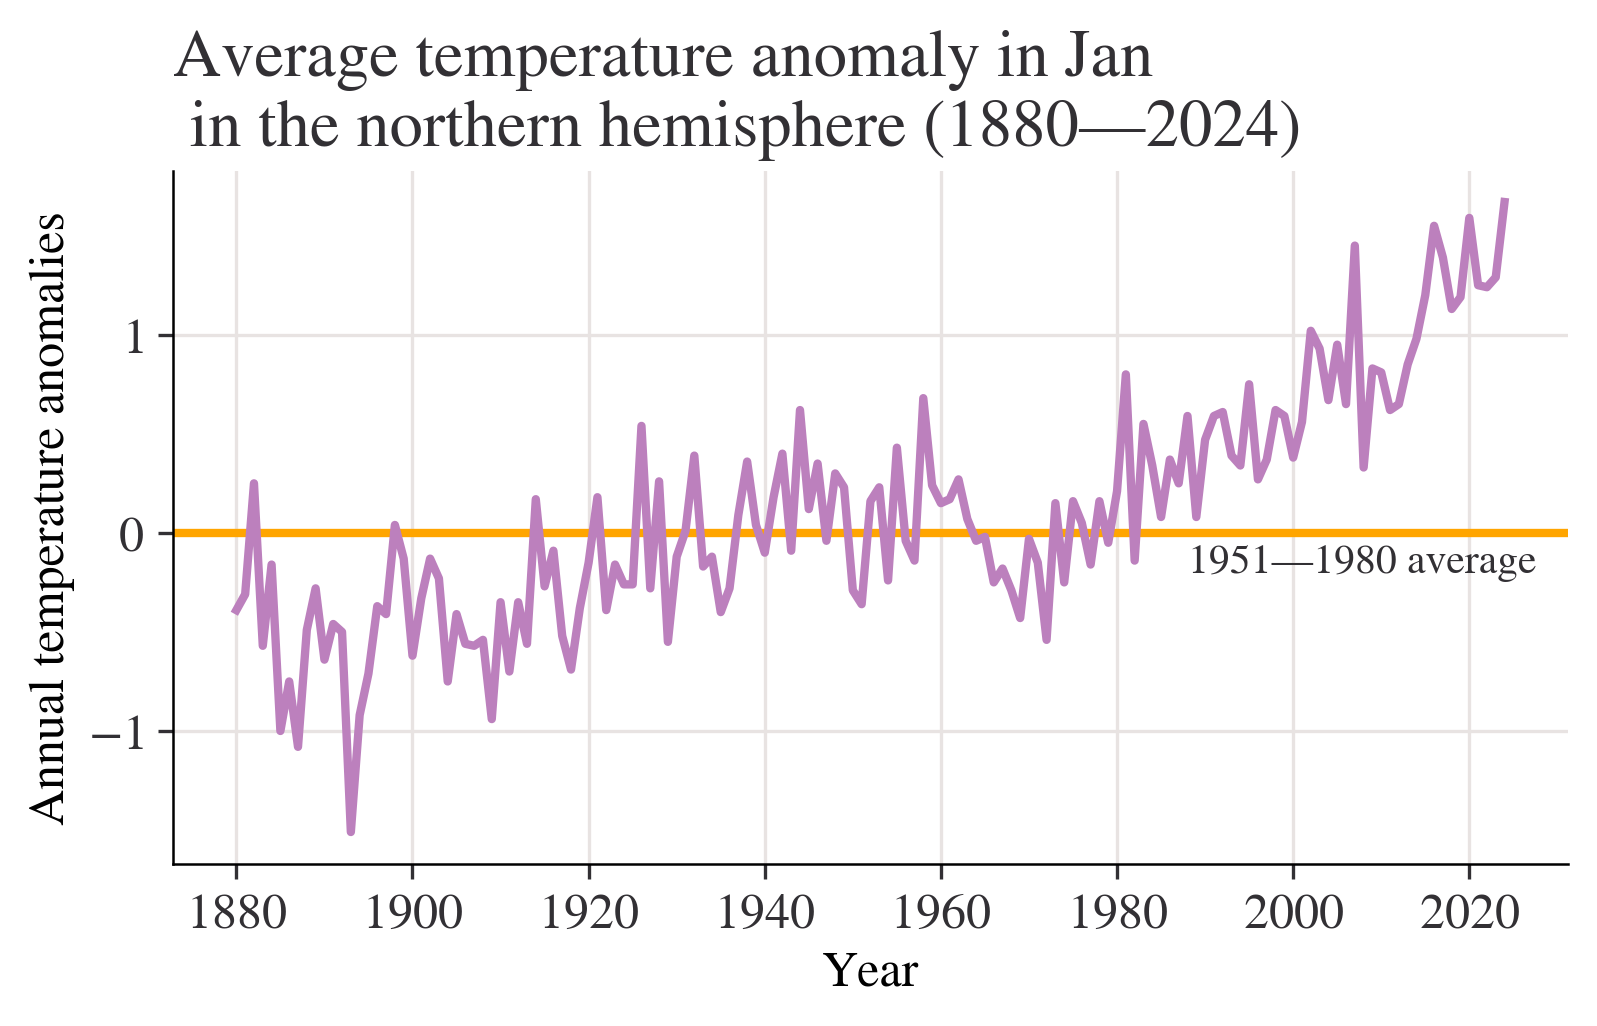

In [15]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

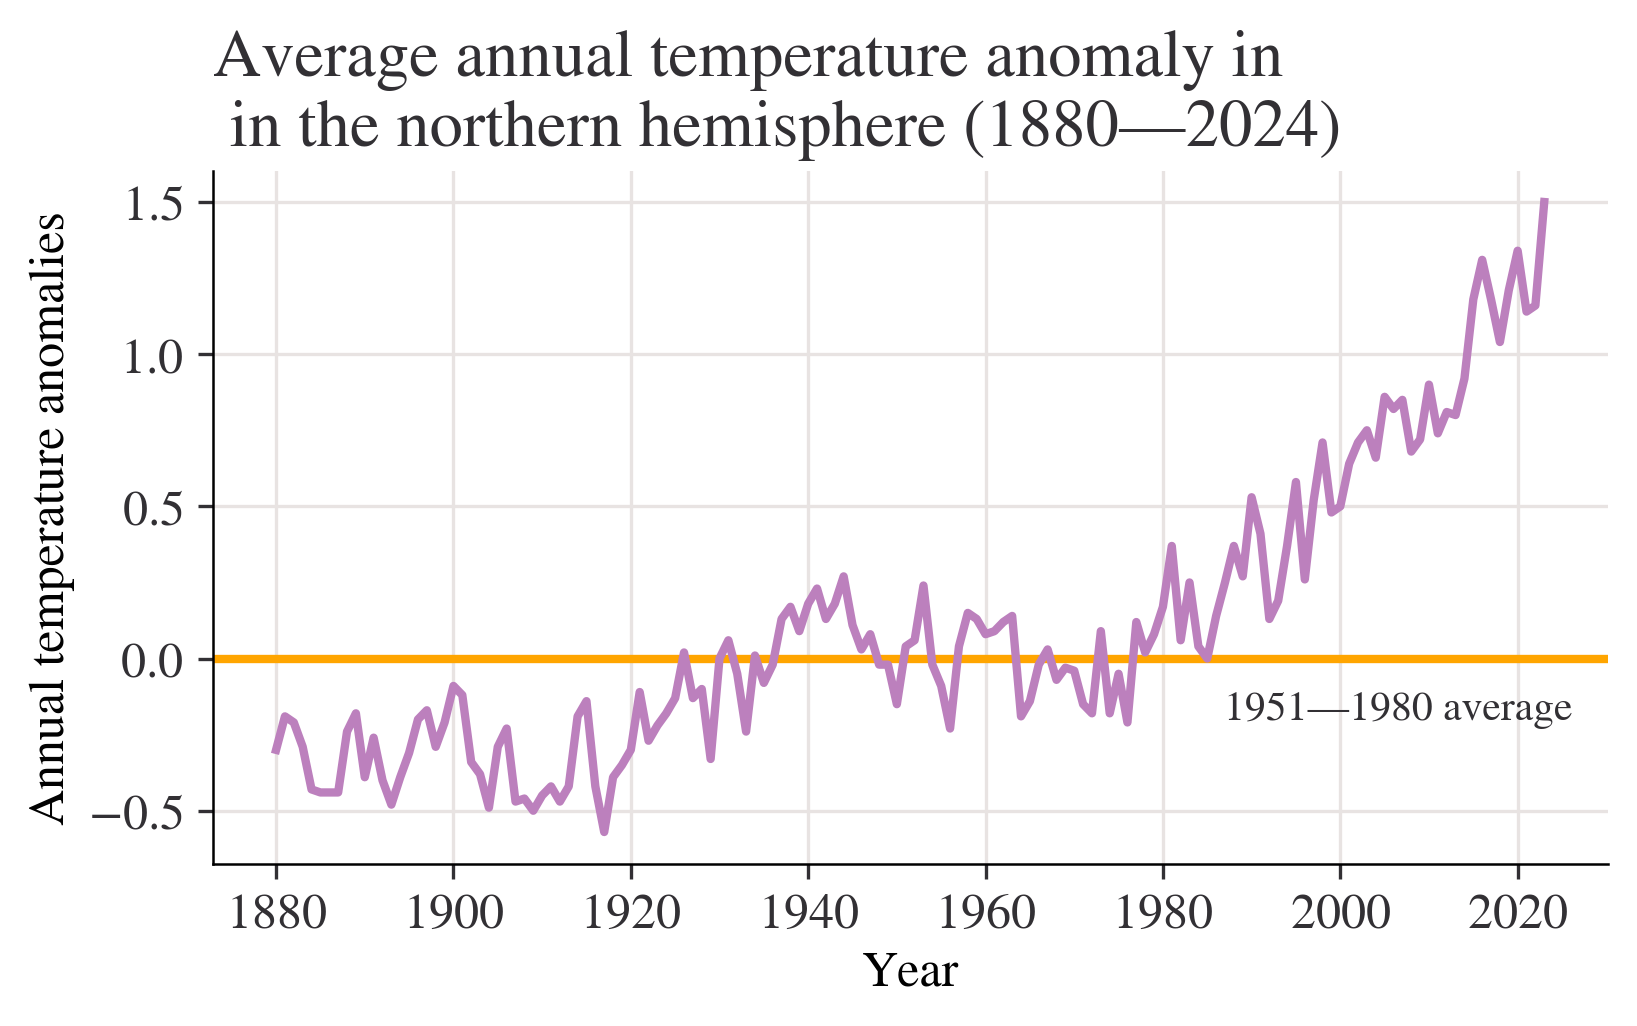

In [17]:
month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

In [19]:
df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)

In [21]:
df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [23]:
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()

Year     
1880  Jun   -0.18
      Jul   -0.22
      Aug   -0.25
1881  Jun   -0.34
      Jul    0.09
dtype: float64

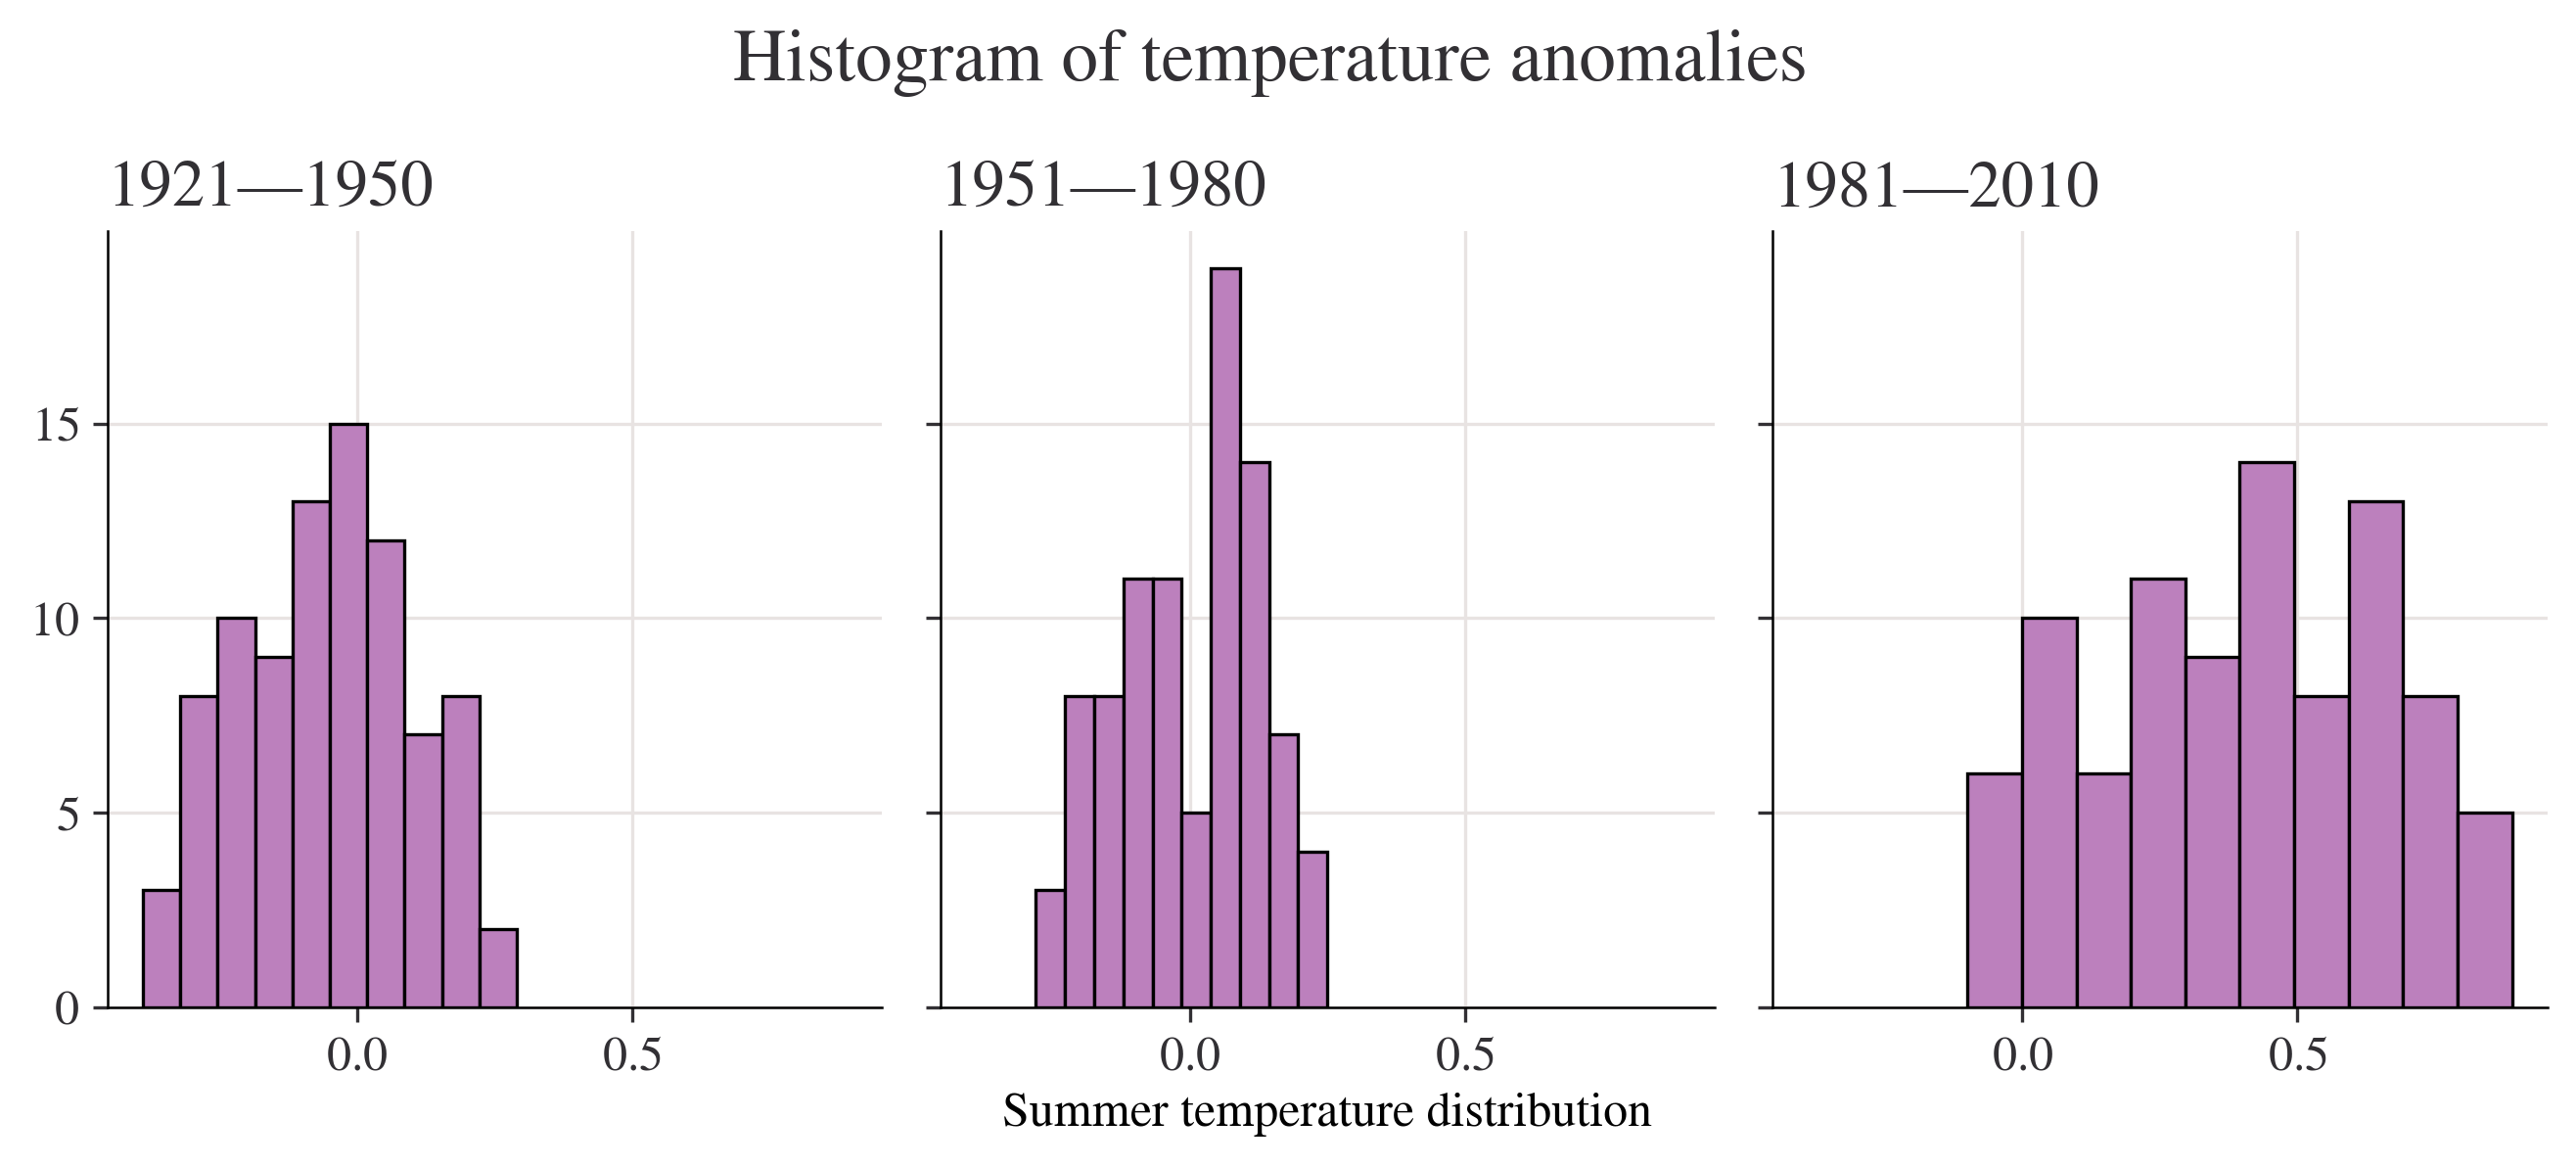

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout();

In [27]:
# Create a variable that has years 1951 to 1980, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

,Year,month,values
0,1951,Jan,-0.36
1,1951,Feb,-0.51
2,1951,Mar,-0.18
3,1951,Apr,0.06
4,1951,May,0.17
...,...,...,...
355,1980,Aug,0.10
356,1980,Sep,0.10
357,1980,Oct,0.12
358,1980,Nov,0.21


In [29]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)

print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1


In [31]:
# Create a variable that has years 1981 to 2010, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

,Year,month,values
0,1981,Jan,0.80
1,1981,Feb,0.62
2,1981,Mar,0.68
3,1981,Apr,0.39
4,1981,May,0.18


In [33]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%


In [35]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%


In [37]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

,Year,Season,Values,Period
444,1991,MAM,0.45,1981—2010
445,1991,JJA,0.42,1981—2010
446,1991,SON,0.32,1981—2010
447,1992,DJF,0.43,1981—2010
448,1992,MAM,0.29,1981—2010
449,1992,JJA,-0.04,1981—2010
450,1992,SON,-0.15,1981—2010
451,1993,DJF,0.37,1981—2010
452,1993,MAM,0.31,1981—2010
453,1993,JJA,0.12,1981—2010


In [39]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
    [np.mean, np.var]
)
grp_mean_var

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7036\1563140002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7036\1563140002.py:1: FutureWarning: The provided callable <function mean at 0x000002448A54F100> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7036\1563140002.py:1: FutureWarning: The provided callable <function var at 0x000002448A54F380> is currently using SeriesGroupBy.var. In a future version of pand

mean       var
Season Period                       
DJF    1921—1950 -0.025862  0.057489
       1951—1980 -0.002000  0.050548
       1981—2010  0.523333  0.078975
JJA    1921—1950 -0.053448  0.021423
       1951—1980  0.000000  0.014697
       1981—2010  0.400000  0.067524
MAM    1921—1950 -0.041034  0.031302
       1951—1980  0.000333  0.025245
       1981—2010  0.509333  0.075737
SON    1921—1950  0.083448  0.027473
       1951—1980 -0.001333  0.026205
       1981—2010  0.429000  0.111127

In [47]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="Values", color="Season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

In [74]:
df_co2 = pd.read_excel("1_CO2-data.xlsx")
df_co2.head()

F:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Year,Month,Monthly average,Interpolated,Trend
0,1958,3,315.71,315.71,314.62
1,1958,4,317.45,317.45,315.29
2,1958,5,317.50,317.50,314.71
3,1958,6,-99.99,317.10,314.85
4,1958,7,315.86,315.86,314.98


In [78]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
3,1958,6,-99.99,317.10,314.85
15,1959,6,318.15,318.15,315.92
27,1960,6,319.59,319.59,317.36
39,1961,6,319.77,319.77,317.48
51,1962,6,320.55,320.55,318.27


In [76]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

,Year,Jun,Trend
0,1958,0.05,314.85
1,1959,0.14,315.92
2,1960,0.18,317.36
3,1961,0.18,317.48
4,1962,-0.13,318.27


In [80]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

In [82]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

,Jun,Trend
Jun,1.000000,0.915419
Trend,0.915419,1.000000


In [84]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

In [86]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)